center_2017_02_20_14_31_04_818.jpg


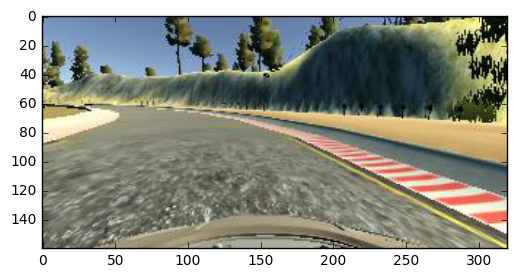

In [8]:
## Import libraries
import os
import argparse
import json
import cv2
import numpy as np
import pandas as pd
from copy import deepcopy
from sklearn.utils import shuffle
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, MaxPooling2D
from keras.regularizers import l2, activity_l2
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation, Reshape

import matplotlib.pyplot as plt
%matplotlib inline

# data paths
session_data = '../P3Training/driving_log.csv'
udacity_data = 'data/driving_log.csv'
path_prefix = 'data/'
session_data_path='../P3Training/IMG/'
f = open(session_data)
images=[]
measurements=[]
for line in f:
    tokens=line.split(',')
    centerNameToken=tokens[0]
    centerNames=centerNameToken.split('/')
    centerName=centerNames[-1]
    centerImage=session_data_path+centerName
    image=plt.imread(centerImage)
    plt.imshow(image)
    print(centerName)
    break;
    '''image=plt.imread(tokens[0])
    plt.imshow(image)
    images.append(image)
    measurements.append(tokens[3])
print(len(images))
print(len(measurements))'''



In [15]:
X_train=np.array(images)
y_train=np.array(measurements)


In [18]:
print(X_train.shape)
print(y_train.shape)

(2054, 160, 320, 3)
(2054,)


In [22]:
model=Sequential()
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,validation_split=0.2,shuffle=True)
model.save('mymodel.h5')

Train on 1643 samples, validate on 411 samples
Epoch 1/10
1643/1643 [==============================] - 36s - loss: 33869192.2694 - val_loss: 390315.7410
Epoch 2/10
1643/1643 [==============================] - 1s - loss: 176412.5494 - val_loss: 9126.2686
Epoch 3/10
1643/1643 [==============================] - 1s - loss: 18521.7479 - val_loss: 8921.7130
Epoch 4/10
1643/1643 [==============================] - 1s - loss: 10168.5384 - val_loss: 5893.5444
Epoch 5/10
1643/1643 [==============================] - 1s - loss: 6305.2381 - val_loss: 5702.9567
Epoch 6/10
1643/1643 [==============================] - 1s - loss: 5033.0164 - val_loss: 4859.9699
Epoch 7/10
1643/1643 [==============================] - 1s - loss: 3413.5352 - val_loss: 4003.5850
Epoch 8/10
1643/1643 [==============================] - 1s - loss: 2968.1659 - val_loss: 2860.1241
Epoch 9/10
1643/1643 [==============================] - 1s - loss: 2650.6080 - val_loss: 2672.1859
Epoch 10/10
1643/1643 [============================